# Kaggle

## 1. 데이터 기본 전처리

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

dir_path = os.path.join(os.getcwd(), "data/")
train = pd.read_csv(dir_path + "/train.csv")
test = pd.read_csv(dir_path + "/test.csv")

print("train columns:", len(train.columns))
print("test columns:",len(test.columns))

train columns: 21
test columns: 20


In [25]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [26]:
# date 전처리
train["date"] = train["date"].apply(lambda date: date[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [27]:
# target 분리
y = train["price"]
train.drop(labels="price", axis="columns", inplace=True)

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [28]:
# id 컬럼 삭제

train.drop(labels="id", axis="columns", inplace=True)

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [29]:
# test 데이터도 동일하게 처리

test["date"] = test["date"].apply(lambda date: date[:6]).astype(int)
test.drop(labels="id", axis="columns", inplace=True)

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [30]:
# target 데이터 확인
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

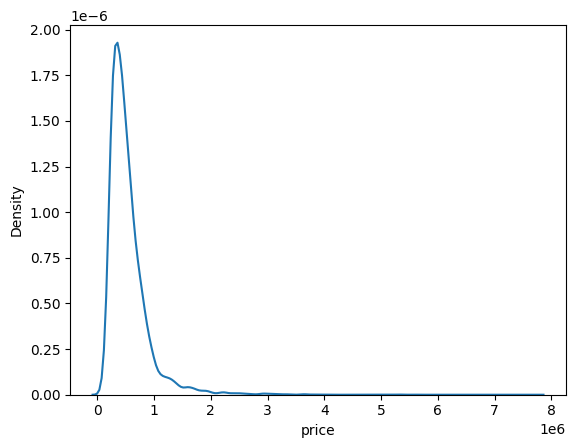

In [31]:
# target 분포 시각화

sns.kdeplot(data=y)
plt.show()

왼쪽으로 치우친 분포를 확인할 수 있다  

로그 변환을 통해 분포를 조정해본다

In [32]:
# np.log1p()

y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

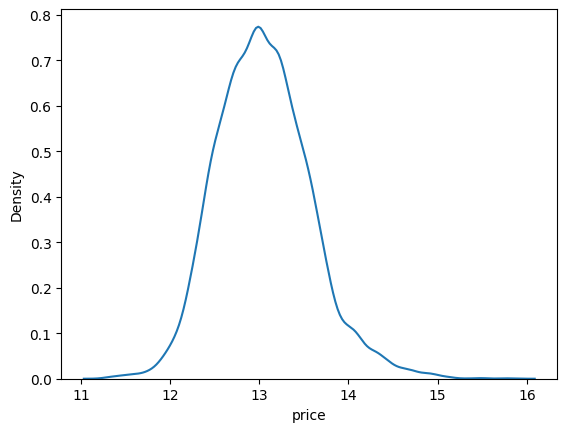

In [34]:
# 바뀐 분포 시각화

sns.kdeplot(data=y)
plt.show()

In [35]:
# train 데이터 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

전처리를 통해 전부 int, float 인 것을 확인

## 2. 실험 준비

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

### 1) 손실 함수

In [39]:
def rmse(y_test, y_pred):
    return root_mean_squared_error(y_test, np.expm1(y_pred))

### 2) 모델 생성

In [43]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state = 2024

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [53]:
setattr(pd, "Int64Index", pd.Index)
setattr(pd, "Float64Index", pd.Index)

df = {}

for model in models:
    
    # 모델 이름
    model_name = model.__class__.__name__

    # train, test 분리
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)
    
    # 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가
    score = rmse(y_test, y_pred)
    df[model_name] = score
    
    # dataFrame 저장
    score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=True)
    
score_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2329
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.047392


,RMSE
GradientBoostingRegressor,615053.327836
RandomForestRegressor,619839.486451
LGBMRegressor,628710.187637
XGBRegressor,638210.671117


### 3) get_scores 함수 구현

In [54]:
def get_scores(models, x, y):
    
    df = {}
    
    for model in models:
    
        model_name = model.__class__.__name__
        X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        score = rmse(y_test, y_pred)
        df[model_name] = score
        
        score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=True)
    return score_df

get_scores(models, train, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2329
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.047392


,RMSE
GradientBoostingRegressor,615053.327836
RandomForestRegressor,619839.486451
LGBMRegressor,628710.187637
XGBRegressor,638210.671117


### 4) 하이퍼파라미터 튜닝

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [1, 10]
}

In [59]:
model = LGBMRegressor(random_state=random_state)

In [60]:
grid_model = GridSearchCV(model, param_grid=param_grid,
             scoring="neg_mean_squared_error",
             cv=5, verbose=1, n_jobs=5)
grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002969 second

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2024), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
grid_model.cv_results_

{'mean_fit_time': array([0.14260392, 0.18971782, 1.21543622, 1.94433584]),
 'std_fit_time': array([0.0006845 , 0.02396225, 0.07304324, 0.03953066]),
 'mean_score_time': array([0.00299959, 0.00286427, 0.00416293, 0.00644064]),
 'std_score_time': array([0.00044127, 0.00103606, 0.00041946, 0.00074416]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [63]:
params = grid_model.cv_results_["params"]
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [64]:
score = grid_model.cv_results_["mean_test_score"]
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [68]:
max_depths = pd.Series([ param["max_depth"] for param in params ], name="max_depth")
n_estimators = pd.Series([ param["n_estimators"] for param in params ], name="n_estimators")
score = pd.Series(score, name="score")
result_df = pd.concat([max_depths, n_estimators, score], axis="columns")
result_df

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


In [69]:
result_df["RMSE"] = np.sqrt(result_df["score"] * -1)
result_df

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


위 RMSE 컬럼은 Log 스케일로 변환되어 계산된 값이기 때문에 RMSLE 이다

In [70]:
result_df = result_df.rename(columns={"RMSE": "RMSLE"})
result_df

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [72]:
# RMSLE 기준 정렬
result_df = result_df.sort_values("RMSLE", ascending=True)
result_df

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


위 과정을 함수로 구현

In [76]:
def grid_search(model, train, y, param_grid, verbose=1, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid,
                                scoring="neg_mean_squared_error",
                                cv=5, verbose=1, n_jobs=5)
    grid_model.fit(train, y)
    params = grid_model.cv_results_["params"]
    scores = grid_model.cv_results_["mean_test_score"]
    result_df = pd.DataFrame(data=params)
    result_df["score"] = scores
    result_df["RMSLE"] = np.sqrt(result_df["score"] * -1)
    result_df = result_df.sort_values("RMSLE", ascending=True)
    return result_df

grid_search(model, train, y, param_grid, 1, 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2327
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.052839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.050187
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


가장 좋은 모델은 max_depth(10), n_estimators(100) 인 모델이다

In [77]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
y_pred = model.predict(test)
y_pred

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

In [78]:
# 로그 스케일 복원
y_pred = np.expm1(y_pred)
y_pred

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

submission.csv 생성

In [80]:
submission_path = os.path.join(dir_path, "sample_submission.csv")
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [81]:
# price 적용
submission["price"] = y_pred
submission.head()

,id,price
0,15035,5.067667e+05
1,15036,4.795061e+05
2,15037,1.345155e+06
3,15038,3.122579e+05
4,15039,3.338645e+05


In [83]:
# csv 파일 저장
save_path = f"{dir_path}/submission_{model.__class__.__name__}_RMSLE_0.164399.csv"
submission.to_csv(save_path, index=False)

위 과정 또한 함수로 구현

In [84]:
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y)
    y_pred = model.predict(test)
    y_pred = np.expm1(y_pred)
    
    submission_path = os.path.join(dir_path, "sample_submission.csv")
    submission = pd.read_csv(submission_path)
    submission["price"] = y_pred
    
    save_path = f"{dir_path}/submission_{model_name}_RMSLE_{rmsle}.csv"
    submission.to_csv(save_path, index=False)
    print(f"{save_path} saved.")

In [85]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
